# Effects of Loan Characteristics on Annual Percentage Rate (APR)
## by Praise Alli-Johnson


## Investigation Overview


In this investigation, I wanted to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, Employment Status , Term and Occupation.


## Dataset Overview

The Loan Data from Prosper data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this <a href='https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000'>data dictionary </a>to understand the dataset's variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
# Let's start by 
# Splitting ListingCreationDate column into year,month,day,time
prosper['year']=prosper['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
prosper['month'] = prosper['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

In [4]:
# replacing numerical values of month with names
prosper.month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [5]:
prosper['ListingCreationDate'] = prosper['ListingCreationDate'].apply(lambda x: x.split("-")[2]).astype(str)


In [6]:
prosper['day'] = prosper['ListingCreationDate'].apply(lambda x: x.split(" ")[0]).astype(str)
prosper['time'] = prosper['ListingCreationDate'].apply(lambda x: x.split(" ")[1]).astype(str)

In [7]:
# drop the original ListingCreationDate column
prosper.drop(columns = ['ListingCreationDate'],inplace = True)

In [8]:
# month into ordered categorical types
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = month_order)
prosper['month'] = prosper['month'].astype(ordered_var)

In [9]:
# Subset the dataframe by selecting features of interest
selected_columns = ['ListingNumber','LoanOriginalAmount','LoanStatus','ListingCategory (numeric)','BorrowerState','BorrowerAPR','BorrowerRate','StatedMonthlyIncome', 'ProsperRating (Alpha)', 
        'Occupation','Term','EmploymentStatus','TotalInquiries','DebtToIncomeRatio','MonthlyLoanPayment','TotalTrades','Investors', 'year', 'month', 'day', 'time']
prosper_sub = prosper[selected_columns]

In [ ]:
color = default_color

## Distribution of loans over the years

- January has the highest number of loans as expected from starting of new year.
- April has the least number of loans
- 2013 sees the highest number of loans 

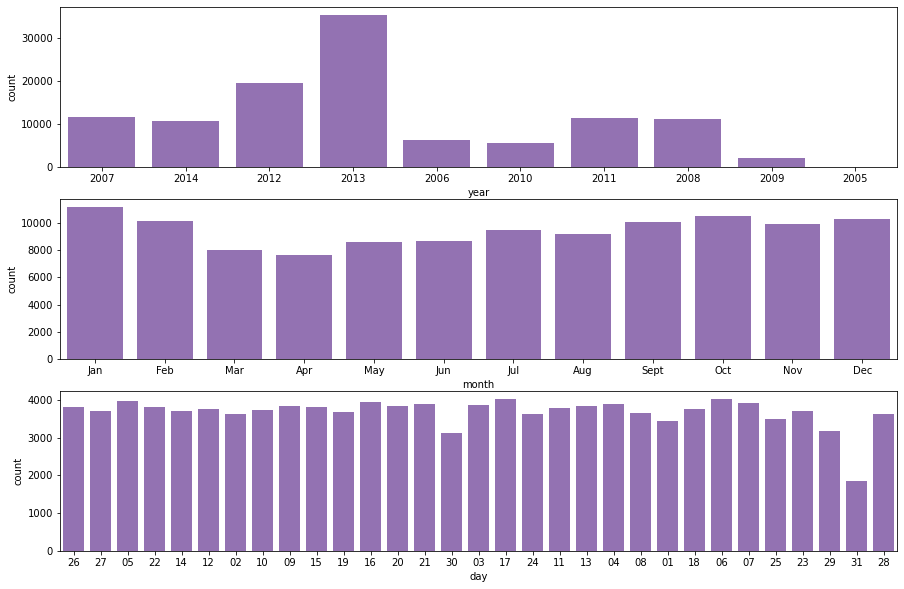

In [10]:
# Let's plot countplots of loans over year, month and day of the month
fig, ax = plt.subplots(nrows=3, figsize = [15,10])
default_color = sb.color_palette()[4]
# sb.countplot(data = prosper, x = 'year', color = default_color, ax = ax[0], order = prosper['year'].value_counts(ascending = True).index)
sb.countplot(data = prosper, x = 'year', color = default_color, ax = ax[0])
sb.countplot(data = prosper, x = 'month', color = default_color, ax = ax[1])
sb.countplot(data = prosper, x = 'day', color = default_color, ax = ax[2]);

## Distribution of Borrower APR.

We can see an oddly excited record between 0.3 and 0.4. The distribution of APR looks multimodal.

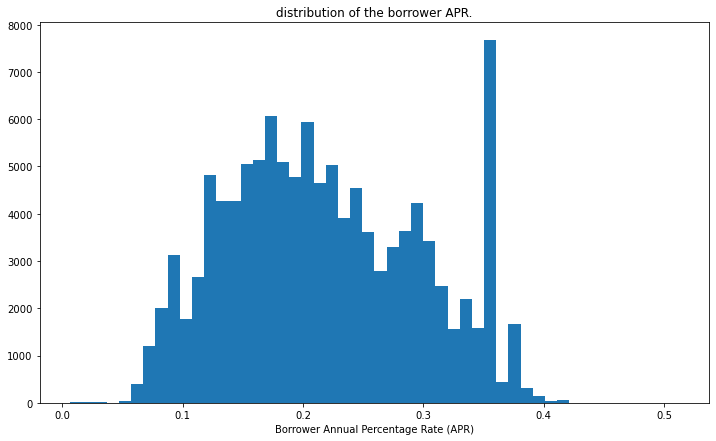

In [11]:
bins = 50
plt.figure(figsize=[12, 7])
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower Annual Percentage Rate (APR)');
plt.title('distribution of the borrower APR.');

##  Distribution of DebtToIncomeRatio

Distribution has unimodal peak around 0.2, which indicates most people prefer 1:4 ratio of debt to Income which is a good thing.


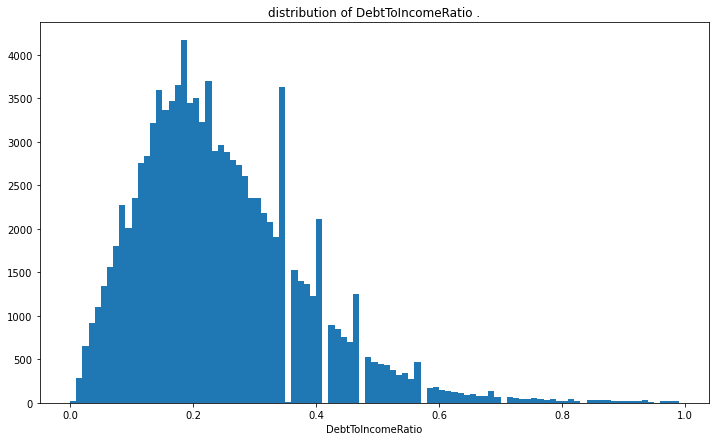

In [12]:
# distribution of DebtToIncomeRatio 
bins = np.arange(0,1, 0.01)
plt.figure(figsize=[12, 7])
plt.hist(data = prosper_sub, x = 'DebtToIncomeRatio', bins = bins);
plt.title('distribution of DebtToIncomeRatio .');
plt.xlabel('DebtToIncomeRatio');

##  Distribution of stated monthly income

The distribution of stated monthly income is severely right screwed, 30k seems to be the most stated Monthly income. 

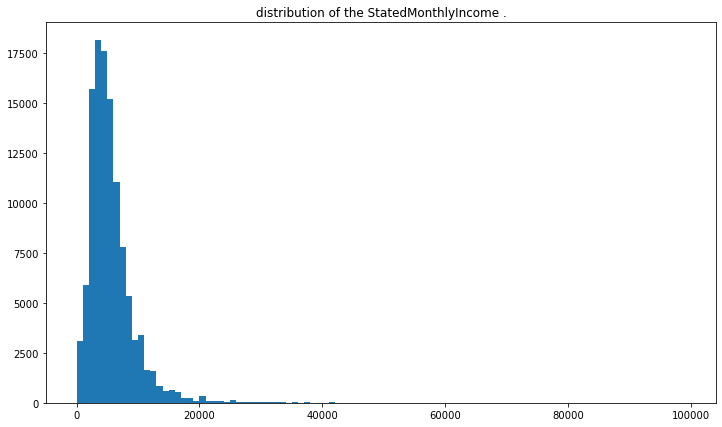

In [13]:
# Distribution of stated monthly income
 
bins = np.arange(0, 100000, 1000)
plt.figure(figsize=[12, 7])
plt.title('distribution of the StatedMonthlyIncome .');
plt.hist(data = prosper_sub, x = 'StatedMonthlyIncome', bins=bins);

##  Borrower APR vs. Loan Amount

Here we see that the borrower APR is negatively correlated with loan amount.

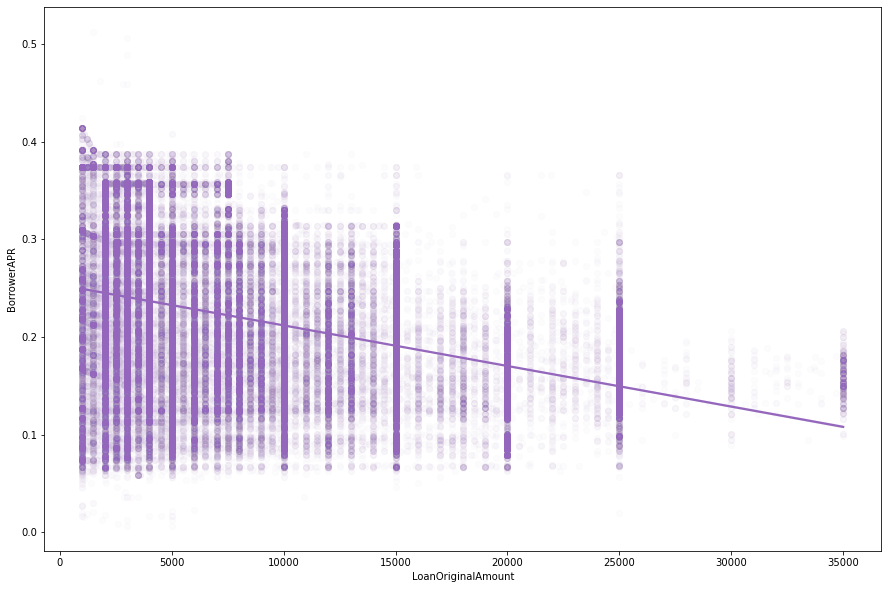

In [14]:
plt.figure(figsize = [15, 10])
sb.regplot(data = prosper_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.02}, color = default_color);

##  Borrower APR vs. Prosper Rating

- The borrower APR decreases with the better rating.
- Borrowers with the best Prosper ratings have the lowest APR.

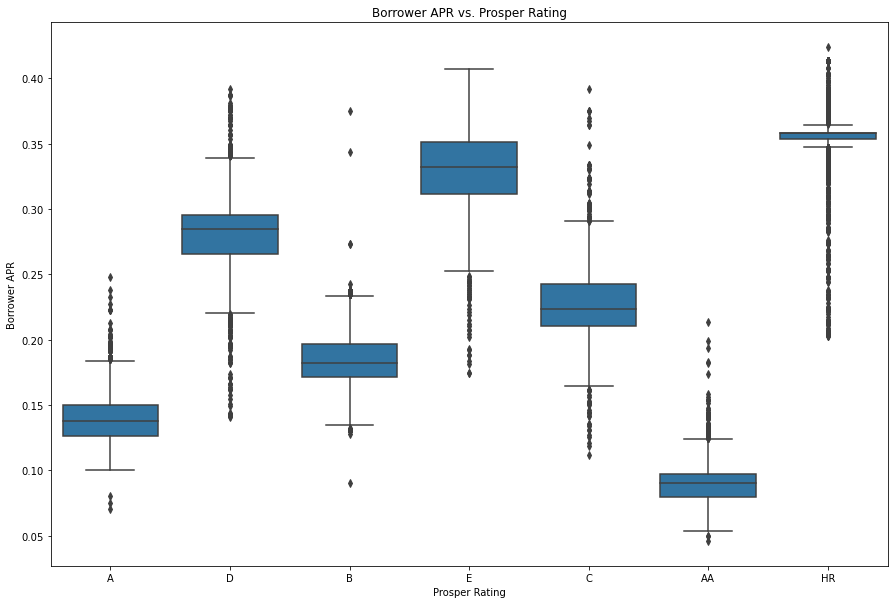

In [15]:
plt.figure(figsize=[15,10])
default_color = sb.color_palette()[0]
sb.boxplot(data=prosper_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

##  Term effect on relationship of APR and loan amount

Term doesn't seem to have any effect on the relationship between APR and loan amount

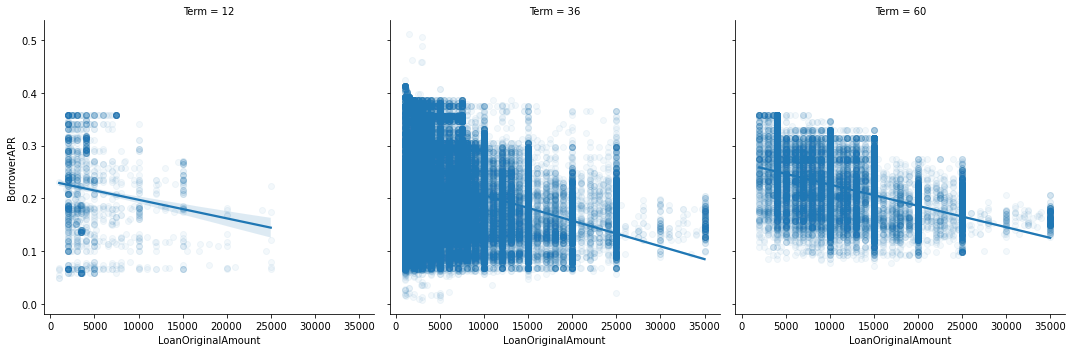

In [16]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data= prosper_sub, height=5, col='Term', col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20}, color = default_color);
g.add_legend();

##  Prosper rating effect on relationship of APR and loan amount

- The loan amount increases with better rating. 
- The borrower APR decreases with better rating. 
- The relationship between borrower APR and loan amount turns positive when the Prosper ratings are increased from HR to AA

It's logical that people with better rating (A or AA) tend to borrow more money.
People with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

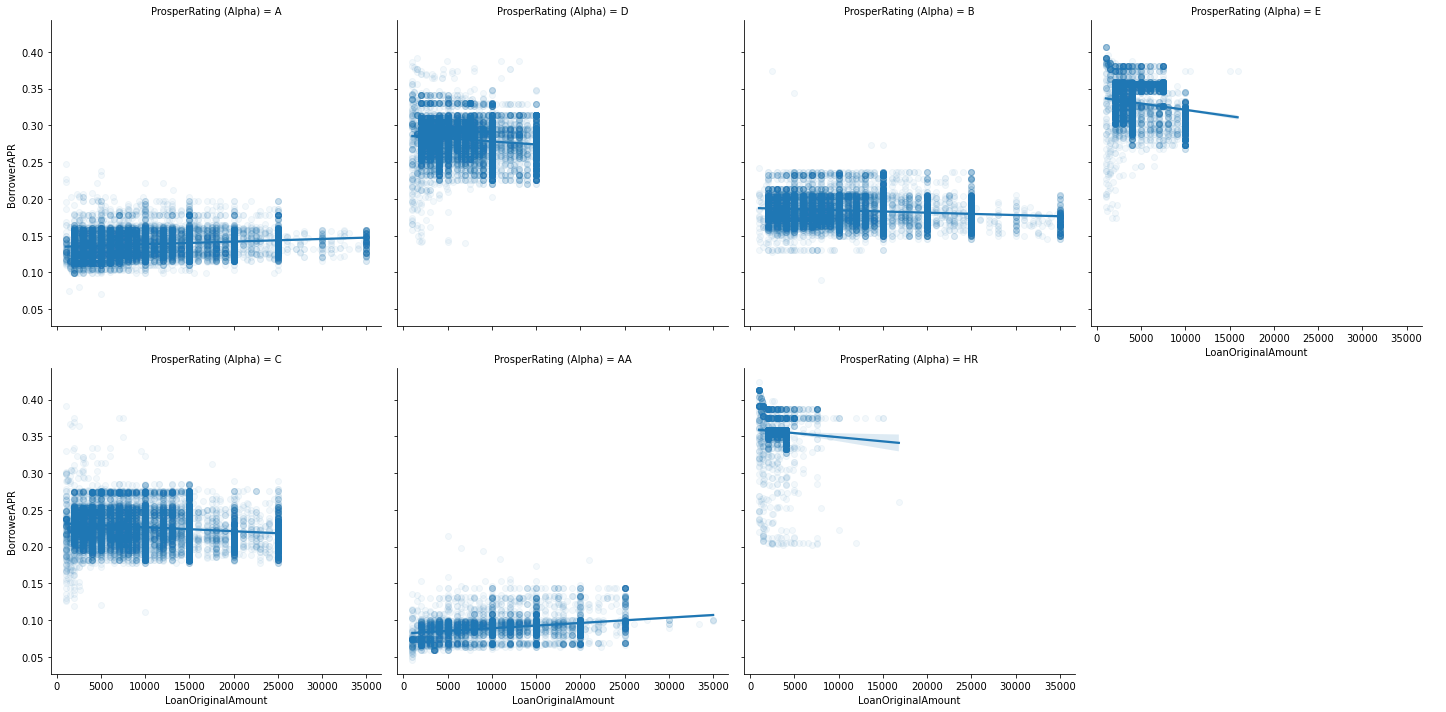

In [17]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=prosper_sub, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20}, color = default_color);
g.add_legend();

##  Borrower APR across rating and term

- We see that the Borrower APR decrease with the an increased Term for people with HR to C raings. 
- The APR increase with an increased borrow Term for people with B to AA ratings, .
- Unemployed borrowers have the highest APR

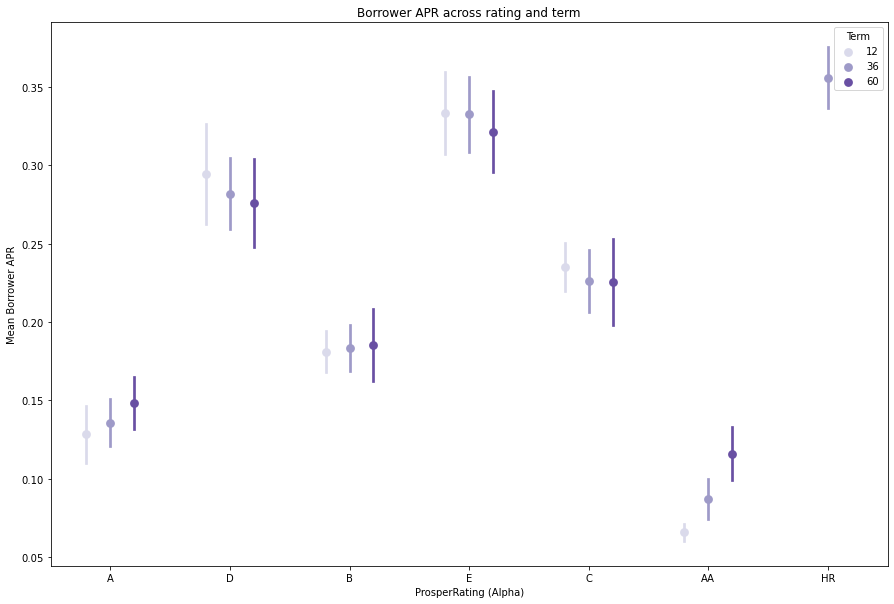

In [18]:
fig = plt.figure(figsize = [15,10])
ax = sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

##  Borrower APR across Employment Status and Term

- Unemployed borrowers have the highest APR

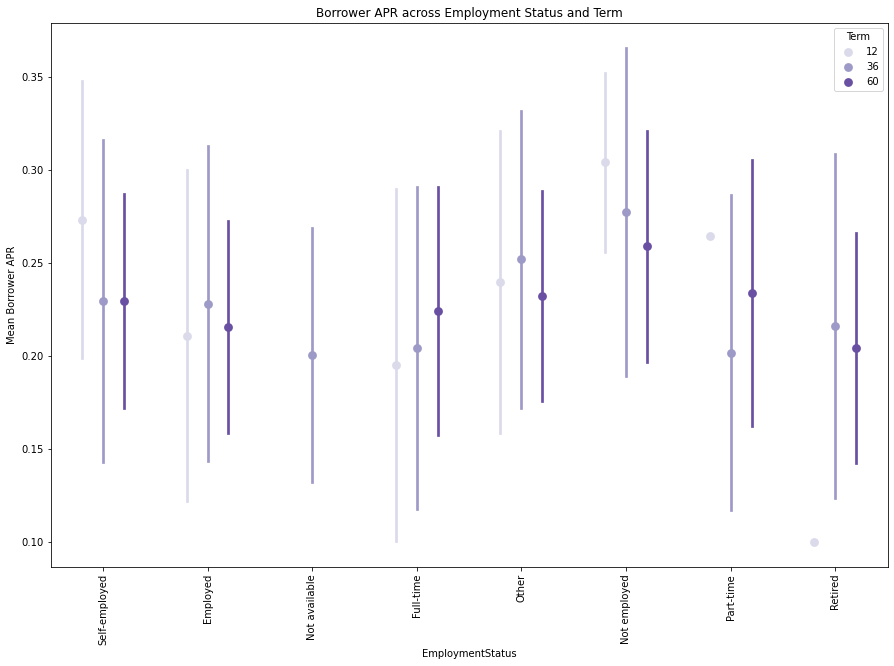

In [19]:
fig = plt.figure(figsize = [15,10])
ax = sb.pointplot(data = prosper_sub, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment Status and Term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);
plt.xticks(rotation = 90);

##  StatedMonthlyIncome and LoanOriginalAmount by Rating and Term

- For stated monthly income, it doesn't seem like there is an interaction effect between term and rating, the pattern of term is similar among different ratings. 
- But for loan amount, there is an interaction between term and rating. With better Prosper rating, the loan amount of each three terms increases.

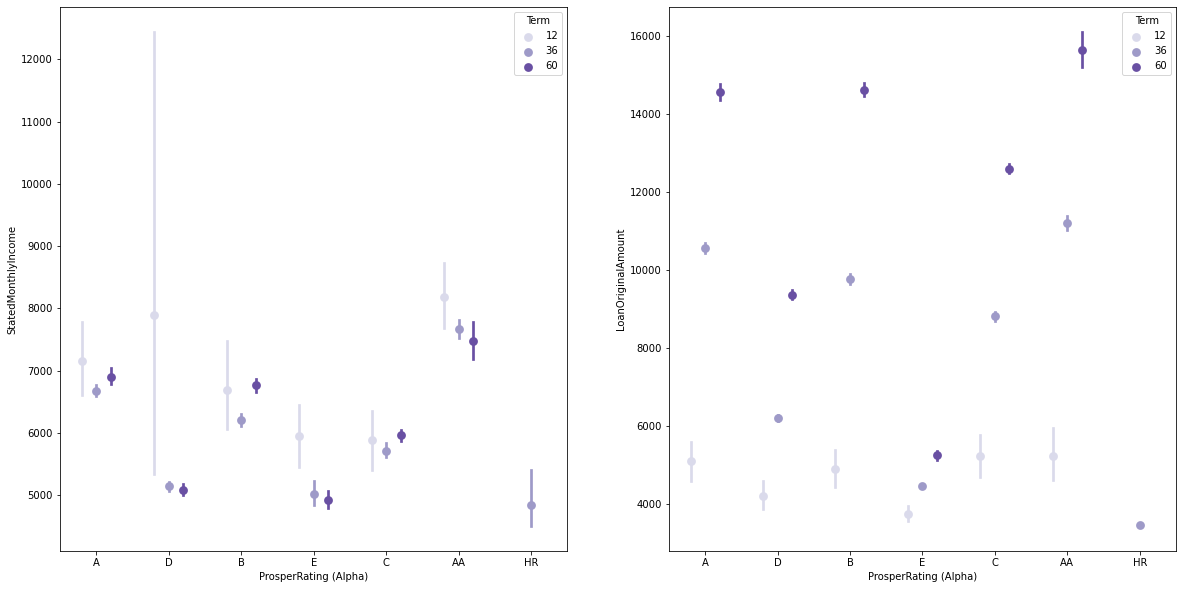

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=[20,10])
sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = prosper_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[1]);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt